In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
title = "# Solutions to random variables and probability distributions"
# Print title and setup TeX defs for both KaTeX and MathJax
import bayesian_stats_course_tools
bayesian_stats_course_tools.misc.display_markdown_and_setup_tex(title)

import matplotlib.style
matplotlib.style.use("bayesian_stats_course_tools.light")

# Solutions to random variables and probability distributions

<!-- Define LaTeX macros -->
$\def\E{\operatorname{E}}$
$\def\Var{\operatorname{Var}}$
$\def\Cov{\operatorname{Cov}}$
$\def\dd{\mathrm{d}}$
$\def\ee{\mathrm{e}}$
$\def\Norm{\mathcal{N}}$
$\def\Uniform{\mathcal{U}}$

<!-- MathJax needs them to be defined again for the non-inline environment -->
$$\def\E{\operatorname{E}}$$
$$\def\Var{\operatorname{Var}}$$
$$\def\Cov{\operatorname{Cov}}$$
$$\def\dd{\mathrm{d}}$$
$$\def\ee{\mathrm{e}}$$
$$\def\Norm{\mathcal{N}}$$
$$\def\Uniform{\mathcal{U}}$$

## Inverse transform sampling

The PDF is
$$
    f(x) = \begin{cases}
                0 & x < 0 \\
                \frac{1}{2}\sin x & \text{otherwise} \\
                0 & x > \pi
            \end{cases}
$$

The CDF is
$$
    F(x) = \begin{cases}
                0 & x < 0 \\
                \frac{1}{2} - \frac{1}{2}\cos x & \text{otherwise} \\
                1 & x > \pi
            \end{cases}\ ,
$$
with its inverse
$$
    F^{-1}(u) = \cos^{-1}(1-2u),\ u\in[0,1]\ .
$$

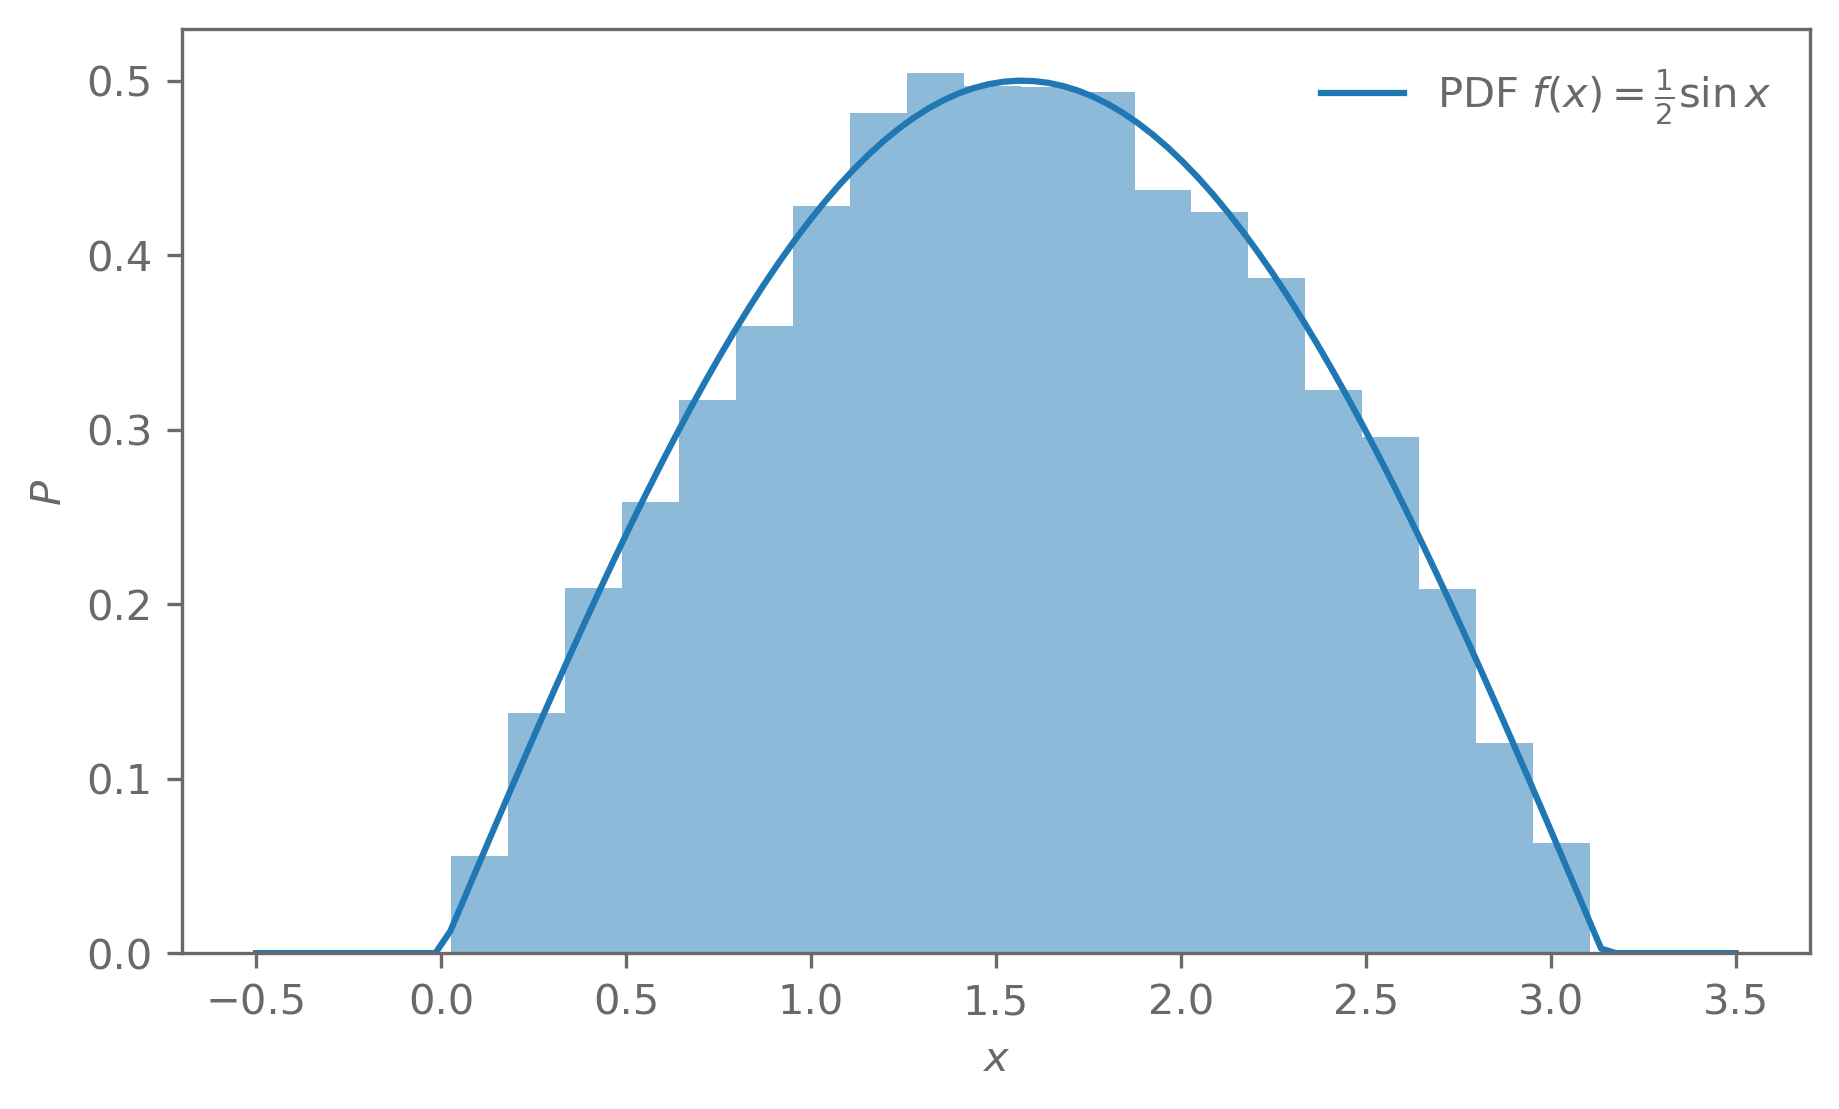

In [6]:
def sin_distr_pdf(x):
    return np.piecewise(x, [(0 <= x) & (x <= np.pi)], [lambda x: 0.5*np.sin(x), 0])

def sin_distr_cdf(x):
    return np.piecewise(x, [x < 0, (0 <= x) & (x <= np.pi)], [0, 0.5 - 0.5*np.cos(x), 1])

def sin_distr_cdf_inv(u):
    if np.any((u < 0) | (1 < u)):
        raise ValueError("u outside domain of (0, 1)")
    return np.arccos(1- 2*u)

n = 10000
u = np.random.uniform(size=n)

grid = np.linspace(-0.5, 3.5, 100)

plt.hist(sin_distr_cdf_inv(u), bins=20, density=True, alpha=0.5)
plt.plot(grid, sin_distr_pdf(grid), c="C0", label=r"PDF $f(x)=\frac{1}{2}\sin x$")
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylabel("$P$");

## Poisson distribution

### Uniform samples in small bins

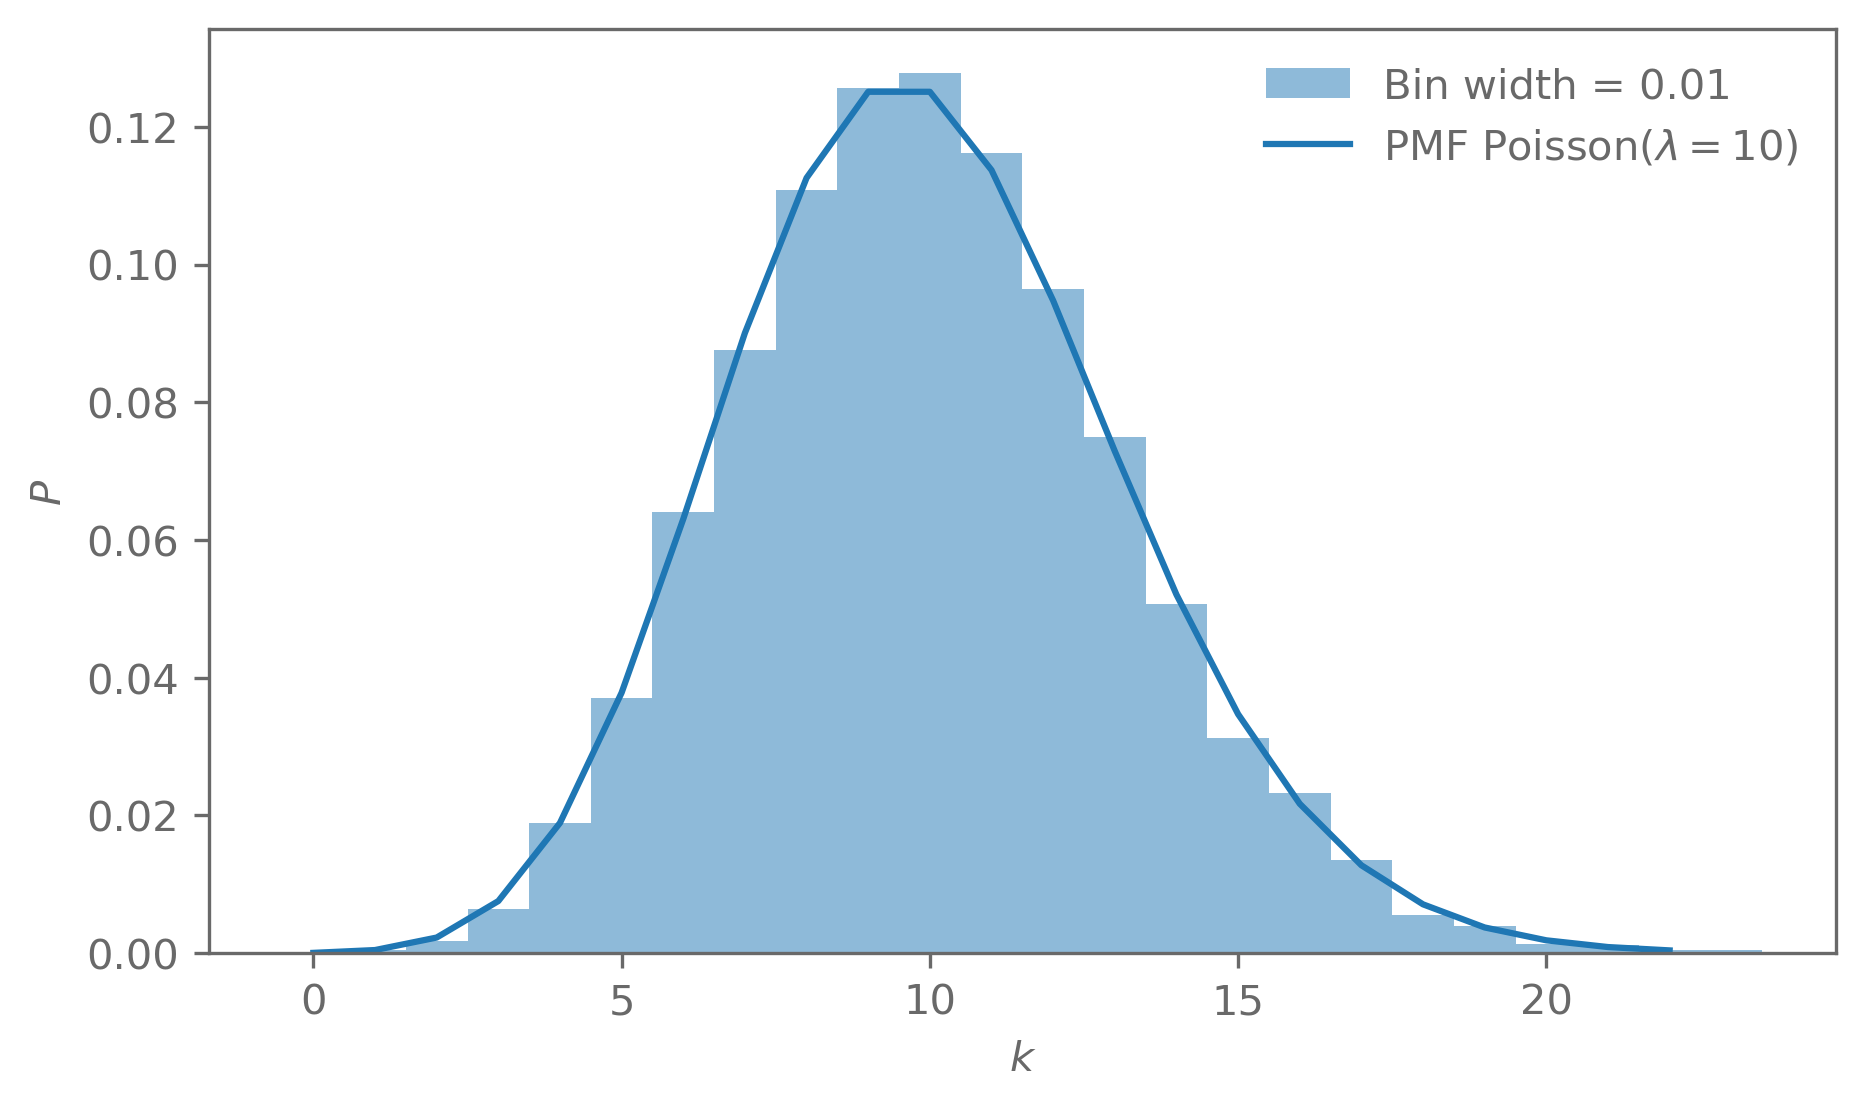

In [9]:
n = 1000
bin_width = 0.01
rate = n*bin_width

x = np.random.uniform(size=(10000, n))

points_in_bin = np.sum((x < bin_width), axis=1)
plt.hist(points_in_bin, bins=np.arange(25)-0.5, density=True, alpha=0.5,
         label=f"Bin width = {bin_width}")
x = np.arange(23)
plt.plot(x, scipy.stats.poisson(rate).pmf(x), c="C0", label=r"PMF $\mathrm{Poisson}(\lambda=10)$")
plt.legend(frameon=False)
plt.xlabel("$k$")
plt.ylabel("$P$");

The approximation breaks down when the bin width is too broad:

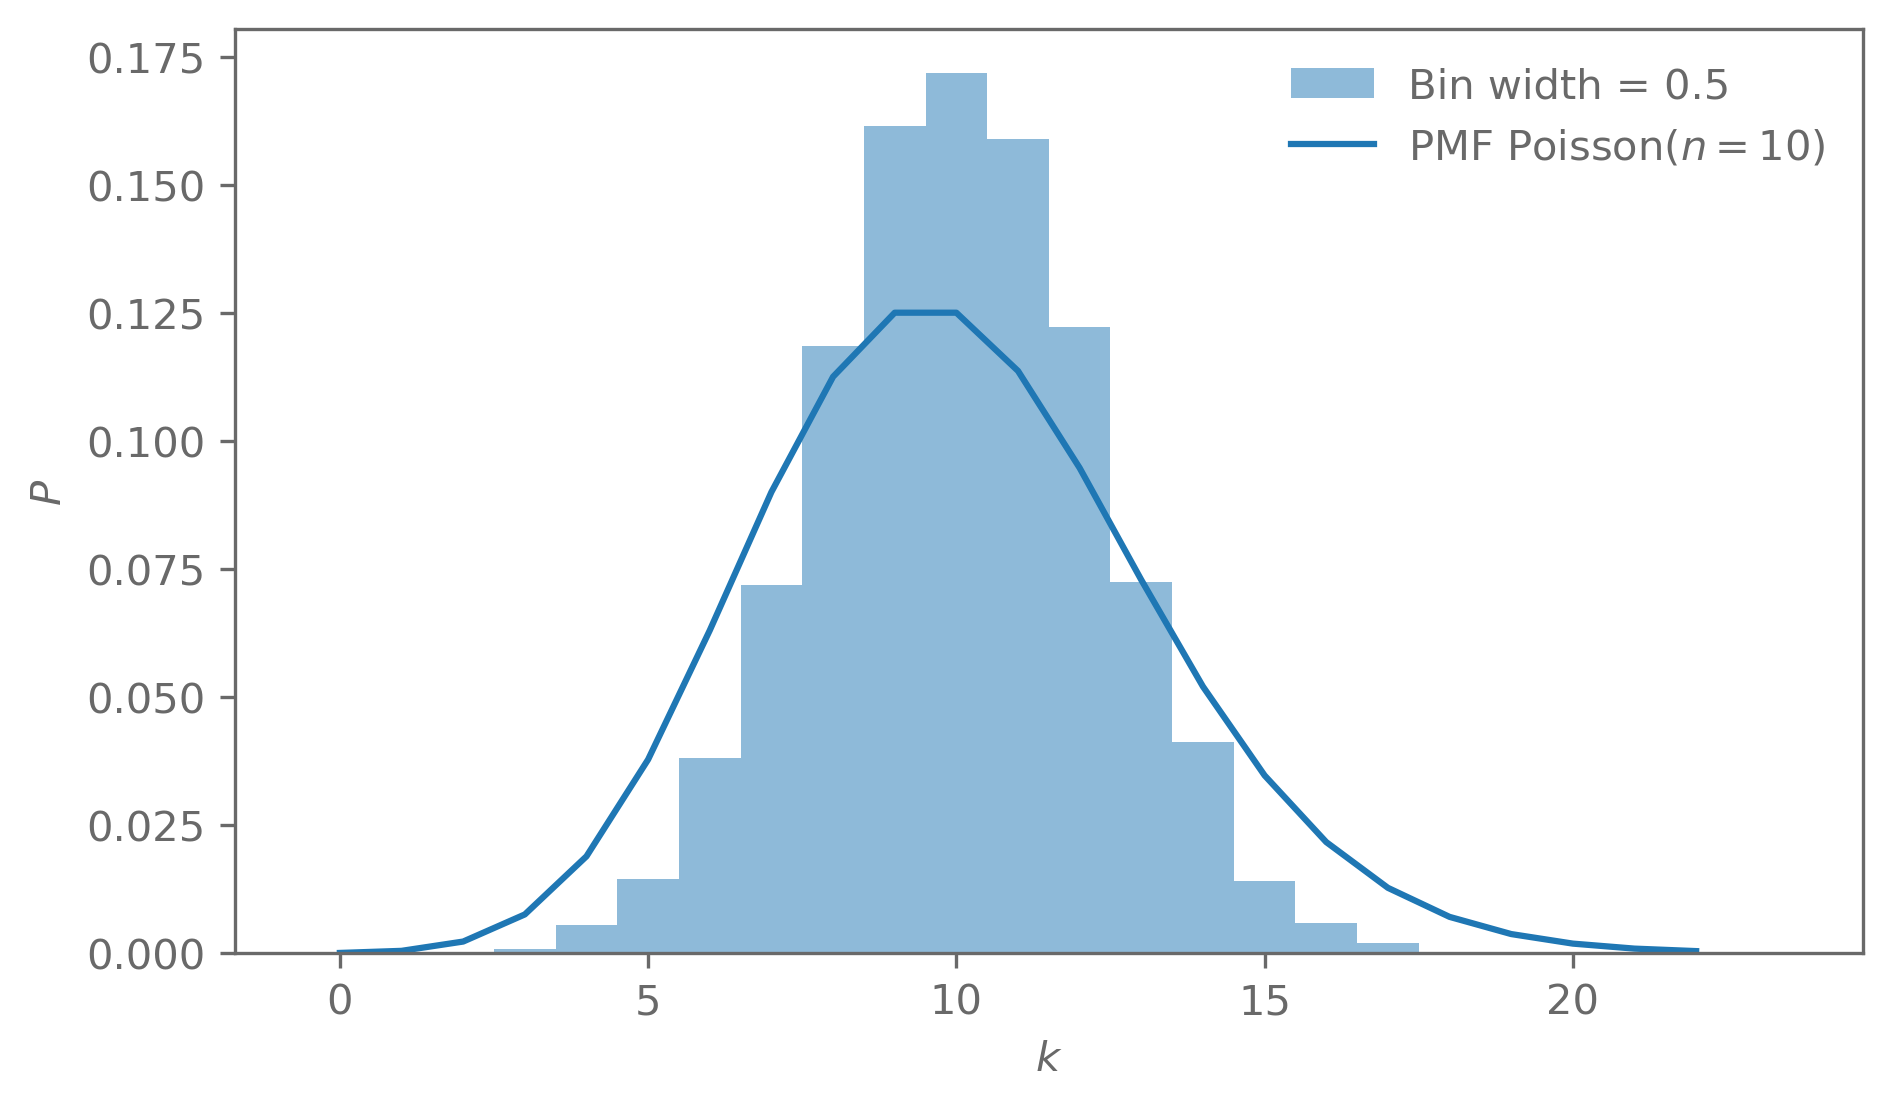

In [10]:
n = 20
bin_width = 0.5
rate = n*bin_width

x = np.random.uniform(size=(10000, n))

points_in_bin = np.sum((x < bin_width), axis=1)
plt.hist(points_in_bin, bins=np.arange(25)-0.5, density=True, alpha=0.5,
         label=f"Bin width = {bin_width}")
x = np.arange(23)
plt.plot(x, scipy.stats.poisson(rate).pmf(x), c="C0", label=r"PMF $\mathrm{Poisson}(n=10)$")
plt.legend(frameon=False)
plt.xlabel("$k$")
plt.ylabel("$P$");

### Derivation of Poisson distribution from the binomial distribution
Let $\lambda$ be the rate of events. This is, in an interval of $T=1$, we expect $\lambda$ events to occur.

Devide the interval into $n$ sub-intervals, such that the probability of more than one event happening per sub-interval goes to 0.

The probability of $k$ events happening in the $n$ sub-intervals is then given by a binomial distribution, with $p=\frac{\lambda}{n}$:
$$
    \Pr(X=k) = \binom{n}{k}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}\left(\frac{\lambda}{n}\right)^k\left(1-\frac{\lambda}{n}\right)^{n-k}
$$
As $n\to\infty$, we have
$$
    \frac{n!}{(n-k)!n^k}=\frac{n(n-1)\dots(n-k+1)}{n^k}\to 1 \ ,
$$
$$
    \left(1-\frac{\lambda}{n}\right)^{-k} \to 1\ ,
$$
$$
    \left(1-\frac{\lambda}{n}\right)^{n} \to \ee^{-\lambda}\ .
$$
Which leaves
$$
    \Pr(X=k) \to \frac{\lambda^k}{k!} \ee^{-\lambda} \ (n\to\infty)\ ,
$$
the PMF of the Poisson distribution

## Change of variables
 
### Sum of Gaussians
The sum of two Gaussian RVs is also Gaussian distributed. We also know that a Gaussian is completely charaterised by its mean and variance. Let $X\sim\Norm(\mu_X, \sigma_X)$, $Y\sim\Norm(\mu_Y, \sigma_Y)$, and $Z = X+Y$. Then 
$$
    \mu_Z = \E[Z] = \E[X] + \E[Y] = \mu_X + \mu_Y
$$
and 
$$
    \sigma_Z^2 = \Var[Z] = \Var[X] + \Var[Y] = \sigma_X^2 + \sigma_Y^2\ .
$$



### Sum of RVs
Let $X\sim p_X$ and $Y\sim p_Y$. What is the distribution of $Z=X+Y$?

One way to solve this is to write the distribution of $Z$ as the marginal of the joint distribution $p_{XZ}$ of $X$ and $Z$:
$$
    p_Z(z) = \int p_{XZ}(x, z)\dd x \ .
$$

We find $p_{XZ}$ using a change of variables: $(x, y) = u\left((x, z)\right)$
$$
    p_{XZ}(x, z) = p_{XY}\left(u\left((x, z)\right)\right)|J_u|\dd x\dd y
$$
The determinant of the Jacobian $J_u$ is 1, so
$$
    p_{XZ}(x, z)= p_{XY}(x=x, y=z-x) = p_{X}(x)p_{Y}(y=z-x) \ ,
$$
where we used that $X$ and $Y$ are independent.
Put together we get
$$
    p_Z(z) = \int p_X(x)p_Y(z-x)\dd x\ .
$$
The distribution of the sum of two independent RVs is a convolution of their respective distributions.

### Chi-squared
$X\sim\Norm(0, 1)$, $Z=X^2$, with $z = g(x)$. Note that $g(x)$ is not monotonic.

$$
    p_Z(z) = \sum_i p_X(g_i^{-1}(z))\left|\frac{\dd g_i^{-1}(z)}{\dd z}\right|\ ,
$$
with $g_i^{-1}(z) = \pm\sqrt{z}$ and $\left|\frac{\dd g_i^{-1}(z)}{\dd z}\right| = \frac{1}{2\sqrt{z}}$.

Which leaves
$$
    p_Z(z) = 2\frac{1}{\sqrt{2\pi}}\ee^{-\frac{1}{2}z}\frac{1}{2\sqrt{z}} = \frac{1}{\sqrt{2\pi z}}\ee^{-\frac{1}{2}z}
$$